In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('Salary_Data.csv')
print(df.head(), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0 None


In [3]:
x = np.array(df[['YearsExperience']])
y = np.array(df['Salary'])

In [4]:
# splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [5]:
mean_x_train = np.mean(x_train)
mean_y_train = np.mean(y_train)
print("Mean of x_train is", mean_x_train)
print("Mean of y train is", mean_y_train)
var_x_train = np.var(x_train)
print("Varience of x_train: ",var_x_train)
sum = 0
for i in range(len(x_train)):
  sum += ((x_train[i] - mean_x_train)*(y_train[i]- mean_y_train))
covar_xy = sum/(len(x_train)-1)
print("Covarience of xy: ", covar_xy)

Mean of x_train is 5.171428571428571
Mean of y train is 74774.85714285714
Varience of x_train:  8.20299319727891
Covarience of xy:  [80421.43571429]


In [6]:
b = covar_xy/var_x_train
a = mean_y_train - (b*mean_x_train)
print("b = ",b)
print("a = ",a)
predicted_y = []

for ele in x_test:
  predicted_y.append(a + b*ele)
predicted_y = pd.DataFrame(predicted_y)
predicted_y

b =  [9803.91349599]
a =  [24074.6187779]


,0
0,81917.708404
1,62309.881412
2,43682.445770
3,117211.796990
4,74074.577607
5,55447.141965
6,72113.794908
7,125054.927787
8,82898.099754


Text(0, 0.5, 'Salary')

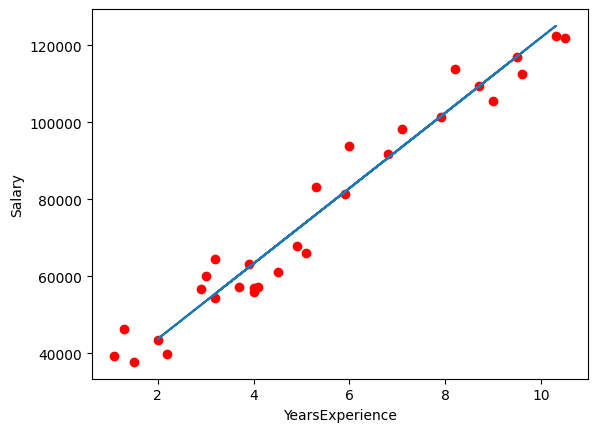

In [8]:
import matplotlib.pyplot as plt
plt.scatter(x,y, c="red")
plt.plot(x_test, predicted_y)
plt.xlabel("YearsExperience")
plt.ylabel("Salary")